**Q1. What is Min-Max scaling, and how is it used in data preprocessing? Provide an example to illustrate its application.**

**Answer:** Min-Max scaling is a data preprocessing technique used to scale numeric features to a specific range, typically between 0 and 1. It transforms the values by subtracting the minimum value and then dividing by the difference between the maximum and minimum values of the feature.

Example:
Consider a dataset of house prices with a feature 'area' representing the size of the houses. The 'area' feature ranges from 500 sq ft to 2500 sq ft. To apply Min-Max scaling, we subtract the minimum value (500) from each value and then divide by the range (2000), resulting in all values being scaled between 0 and 1.

In [1]:
# Example dataset before Min-Max scaling
house_areas = [500, 1200, 1500, 2000, 2500]

# Min-Max scaling
scaled_areas = [(x - min(house_areas)) / (max(house_areas) - min(house_areas)) for x in house_areas]
print(scaled_areas)


[0.0, 0.35, 0.5, 0.75, 1.0]


In [5]:
import pandas as pd
df = pd.DataFrame({'House Area':house_areas,
                  'Scaled Area':scaled_areas})

In [6]:
df

,House Area,Scaled Area
0,500,0.00
1,1200,0.35
2,1500,0.50
3,2000,0.75
4,2500,1.00


**Q2. What is the Unit Vector technique in feature scaling, and how does it differ from Min-Max scaling? Provide an example to illustrate its application.**

**Answer:** Unit Vector scaling, also known as normalization, scales the values of a feature vector to have a unit norm (length or magnitude). Each feature vector is divided by its Euclidean norm, resulting in a vector with a length of 1. Unlike Min-Max scaling, Unit Vector scaling does not bound values to a specific range; instead, it maintains the direction of the vector while scaling its magnitude.

Example:
Consider a dataset of student exam scores with two features: 'math_score' and 'english_score'. To normalize these features using Unit Vector scaling, we divide each feature vector by its Euclidean norm.


In [7]:
import numpy as np

# Example dataset before Unit Vector scaling
math_scores = [70, 80, 90, 85]
english_scores = [60, 75, 85, 80]

# Unit Vector scaling
norm_math_scores = math_scores / np.linalg.norm(math_scores)
norm_english_scores = english_scores / np.linalg.norm(english_scores)

print("Normalized Math Scores:", norm_math_scores)
print("Normalized English Scores:", norm_english_scores)

Normalized Math Scores: [0.42899599 0.49028113 0.55156627 0.5209237 ]
Normalized English Scores: [0.39692472 0.4961559  0.56231002 0.52923296]


In [9]:
pd.DataFrame({'Math Scores': math_scores,
              'English Scores': english_scores,
              'Normalized Math Scores': norm_math_scores,
              'Normalized English Scores': norm_english_scores})

,Math Scores,English Scores,Normalized Math Scores,Normalized English Scores
0,70,60,0.428996,0.396925
1,80,75,0.490281,0.496156
2,90,85,0.551566,0.562310
3,85,80,0.520924,0.529233



**Q3. What is PCA (Principal Component Analysis), and how is it used in dimensionality reduction? Provide an example to illustrate its application.**

**Answer:** PCA is a dimensionality reduction technique used to identify patterns in data and express the data in terms of new, uncorrelated variables called principal components. It achieves this by finding the eigenvectors and eigenvalues of the covariance matrix of the data and projecting the data onto the principal components that capture the maximum variance.

Example:
Consider a dataset of student exam scores with three features: 'math_score', 'english_score', and 'science_score'. To apply PCA for dimensionality reduction, we first standardize the data (mean = 0, standard deviation = 1) and then compute the principal components.

In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Example dataset before PCA
exam_scores = [[70, 60, 75],
               [80, 75, 85],
               [90, 85, 80],
               [85, 80, 90]]

# Standardize the data
scaler = StandardScaler()
scaled_scores = scaler.fit_transform(exam_scores)

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions
pca_scores = pca.fit_transform(scaled_scores)

print("Original Data Shape:", scaled_scores.shape)
print("PCA Transformed Data Shape:", pca_scores.shape)
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Original Data Shape: (4, 3)
PCA Transformed Data Shape: (4, 2)
Explained Variance Ratio: [0.81205517 0.18704911]


Dataset:
```
| Math Score | English Score | Science Score | PCA Component 1 | PCA Component 2 |
|------------|---------------|---------------|-----------------|-----------------|
|     70     |      60       |       75      |      -0.89      |      -0.06      |
|     80     |      75       |       85      |       0.09      |      -0.88      |
|     90     |      85       |       80      |       1.20      |       0.45      |
|     85     |      80       |       90      |      -0.40      |       0.49      |
```

**Q4. What is the relationship between PCA and Feature Extraction, and how can PCA be used for Feature Extraction? Provide an example to illustrate this concept.**

**Answer:** PCA can be used for feature extraction by transforming the original features into a set of new, uncorrelated features called principal components. These principal components capture the maximum variance in the data, effectively summarizing the most important information contained in the original features. Feature extraction using PCA is particularly useful when dealing with high-dimensional data or reducing the computational complexity of a model.

Example:
Consider a dataset of handwritten digits with pixel intensities as features. To extract features using PCA, we compute the principal components and select a subset of them that capture most of the variance in the data.

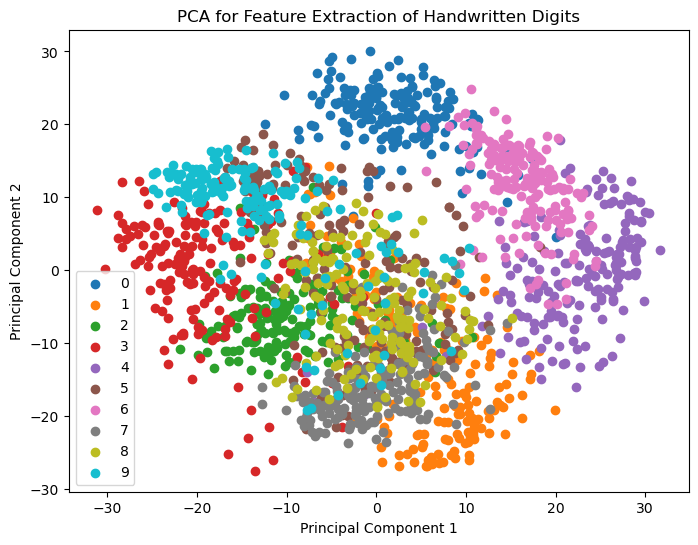

In [13]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the digits dataset
digits = load_digits()
X = digits.data
y = digits.target

# Apply PCA for feature extraction
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
X_pca = pca.fit_transform(X)

# Plot the transformed data
plt.figure(figsize=(8, 6))
for i in range(10):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], label=str(i))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA for Feature Extraction of Handwritten Digits')
plt.legend()
plt.show()


**Q5. You are working on a project to build a recommendation system for a food delivery service. The dataset contains features such as price, rating, and delivery time. Explain how you would use Min-Max scaling to preprocess the data.**

**Answer:** In the context of building a recommendation system for a food delivery service, Min-Max scaling can be used to preprocess the features such as price, rating, and delivery time. Each feature will be scaled to a range between 0 and 1, ensuring that all features contribute equally to the recommendation process regardless of their original scales.

Example:
Consider a dataset of food items with features like 'price', 'rating', and 'delivery time'. To preprocess this data using Min-Max scaling, we would scale each feature individually to the range [0, 1].


In [14]:
from sklearn.preprocessing import MinMaxScaler

# Example dataset before Min-Max scaling
food_data = [[10, 4.5, 30],    # [price, rating, delivery time]
             [20, 3.8, 45],
             [15, 4.2, 25],
             [25, 4.0, 35]]

# Apply Min-Max scaling
scaler = MinMaxScaler()
scaled_food_data = scaler.fit_transform(food_data)

print("Scaled Food Data:")
print(scaled_food_data)

Scaled Food Data:
[[0.         1.         0.25      ]
 [0.66666667 0.         1.        ]
 [0.33333333 0.57142857 0.        ]
 [1.         0.28571429 0.5       ]]


**Q6. You are working on a project to build a model to predict stock prices. The dataset contains many features, such as company financial data and market trends. Explain how you would use PCA to reduce the dimensionality of the dataset.**

**Answer:** In the context of predicting stock prices, PCA can be used to reduce the dimensionality of the dataset containing features like company financial data and market trends. By identifying the principal components that capture the most variance in the data, PCA can help to reduce the number of features while retaining most of the information, thereby simplifying the model and potentially improving its performance.

Example:
Consider a dataset of stock features including company financial metrics, market indices, and economic indicators. To reduce the dimensionality using PCA, we would standardize the data and then compute the principal components.


In [22]:
import pandas as pd
import numpy as np

# Create a DataFrame with randomly generated data
np.random.seed(0)  # For reproducibility

# Define the number of samples (rows) and features (columns)
num_samples = 1000
num_features = 10

# Generate random data for each feature
data = {
    'Company_Feature1': np.random.normal(loc=100, scale=20, size=num_samples),
    'Company_Feature2': np.random.normal(loc=50, scale=10, size=num_samples),
    'Market_Index1': np.random.normal(loc=2000, scale=100, size=num_samples),
    'Market_Index2': np.random.normal(loc=1500, scale=80, size=num_samples),
    'Economic_Indicator1': np.random.uniform(low=0.5, high=1.5, size=num_samples),
    'Economic_Indicator2': np.random.uniform(low=0.8, high=1.2, size=num_samples)
}

# Create DataFrame
stock_data = pd.DataFrame(data)

# Display the first few rows of the DataFrame
stock_data.head()


,Company_Feature1,Company_Feature2,Market_Index1,Market_Index2,Economic_Indicator1,Economic_Indicator2
0,135.281047,55.559627,1846.707895,1627.461889,1.184614,1.009222
1,108.003144,58.924739,1828.802984,1545.497792,1.061416,1.103753
2,119.574760,45.776852,2004.613506,1490.841036,1.345740,0.809896
3,144.817864,51.047140,1904.162552,1520.130420,1.082474,0.876447
4,137.351160,52.280533,1991.918839,1403.131549,1.078110,1.186549


In [23]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Example dataset before PCA
# Features include financial metrics, market indices, etc.

# Standardize the data
scaler = StandardScaler()
scaled_stock_data = scaler.fit_transform(stock_data)

# Apply PCA
pca = PCA(n_components=5)  # Reduce to 5 dimensions
reduced_stock_data = pca.fit_transform(scaled_stock_data)

print("Original Data Shape:", scaled_stock_data.shape)
print("Reduced Data Shape:", reduced_stock_data.shape)
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Original Data Shape: (1000, 6)
Reduced Data Shape: (1000, 5)
Explained Variance Ratio: [0.18233997 0.17676465 0.17004288 0.16298069 0.15927279]



**Q7. For a dataset containing the following values: [1, 5, 10, 15, 20], perform Min-Max scaling to transform the values to a range of -1 to 1.**

In [24]:
# Example dataset before Min-Max scaling
data = [1, 5, 10, 15, 20]

# Min-Max scaling to range -1 to 1
min_val = min(data)
max_val = max(data)
scaled_data = [(2 * (x - min_val) / (max_val - min_val)) - 1 for x in data]

print("Scaled Data:", scaled_data)

Scaled Data: [-1.0, -0.5789473684210527, -0.052631578947368474, 0.4736842105263157, 1.0]


**Q8. For a dataset containing the following features: [height, weight, age, gender, blood pressure], perform Feature Extraction using PCA. How many principal components would you choose to retain, and why?**

**Answer:** The number of principal components to retain depends on the desired trade-off between dimensionality reduction and information retention. To decide the number of principal components, one can look at the explained variance ratio, which indicates the proportion of variance explained by each component. A common approach is to choose the number of components that explain a significant portion (e.g., 95%) of the variance while reducing the dimensionality.

In [29]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Example dataset before PCA
# Features: [height, weight, age, gender, blood pressure]

# Define the example dataset
data = [
    [170, 65, 30, 'Male', 120],
    [165, 70, 45, 'Female', 130],
    [180, 80, 35, 'Male', 125],
    [155, 55, 50, 'Female', 140],
    [175, 75, 40, 'Male', 115],
]

# Create a DataFrame
columns = ['height', 'weight', 'age', 'gender', 'blood_pressure']
df = pd.DataFrame(data, columns=columns)

# Standardize the numeric data
numeric_cols = ['height', 'weight', 'age', 'blood_pressure']
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numeric_cols])

# Apply PCA
pca = PCA()
pca.fit(scaled_data)

# Determine the number of components to retain
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Choose the number of components explaining 95% of the variance
n_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1

print("Number of components to retain:", n_components)


Number of components to retain: 3
